## DC Traffic Accident Analysis
#### Goal of Analysis: Analyze traffic accident data to understand when the highest frequency of accidents occur and to create a model to predict the number of traffic accidents in the Washington DC area at a provided date/time under specified conditions.

#### Hypothesis: The highest frequency of traffic accidents were in the winter months and on or near holidays

- Accident and weather data for the DC area from 2015-2019 was analyzed to predict accident rate of occurence
- A regression model was implemented to make predictions based on factors such as time of day, time of year, weather, etc.

#### Conclusion:
- There was no clear trend in accident count by month, though fewer accidents were observed in the winter months compared to the rest of the year
- More accidents occured at night than at any other time of day
- There was no statistical difference between the accident count on week days vs. weekends
- There were a significantly greater number of accidents on non-holidays compared to holidays
- There were a significantly fewer number of accidents near-holidays compared to the rest of the year
- A Random Forest Regression model has been trained to predict the number of accidents in the future


### Section I: Import data, packages

In [1]:
#Import packages
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
#Define function to import data
def import_data(filepath):
    '''
    This function imports data from a csv file at the provided filepath and sheet name
    
    Input:
        filepath (str): Filepath including filename of the .csv file to be loaded
        
    Output: Pandas dataframe
    '''
    return pd.read_csv(filepath)

In [3]:
#Set directory to import files
directory = r'C:\Users\T2ZKQ0\Documents\Python Scripts\DC Traffic Accident Analysis\Raw Data'

#### Import accident data

In [4]:
#Import Traffic accident data
df_crash = import_data('dc_crashes_filtered.csv')

/Users/jacoblangley/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3242: DtypeWarning: Columns (4,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


#### Import weather data

In [5]:
#Import weather data into separate df's
weather_directory = os.getcwd() + '/' 'Weather_data_17to19'
df_weather1 = import_data(weather_directory + '/' + 'Weather_data_14to15.csv')
df_weather2 = import_data(weather_directory + '/' + 'Weather_data_15to17.csv')
df_weather3 = import_data(weather_directory + '/' + 'Weather_data_17to19.csv')

In [6]:
#Combine weather dataframes
weather_dfs = [df_weather1, df_weather2, df_weather3]
df_weather = pd.concat(weather_dfs)

#### Evaluate data

In [7]:
#Check df shapes
print('Accident data:', df_crash.shape, '\n' + 'Weather data:', df_weather.shape)

Accident data: (142683, 56) 
Weather data: (175607, 10)


In [8]:
#Brief view of the crash dataset
df_crash.head()

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCATIONERROR,LASTUPDATEDATE,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY,BLOCKKEY,SUBBLOCKKEY
0,-77.027485,38.967482,111446791,27037061,16138142,2016-08-18 04:31:24+00:00,11040042,5725.363,0.000000,6836.0,...,7.843781,South,NaN,NaN,38.967472,-77.027436,397500.88,144278.66,NaN,NaN
1,-77.013219,38.969421,111446799,27037086,16138141,2016-08-18 05:30:42+00:00,47014172,135.331,0.000000,-9.0,...,46.307588,East,NaN,NaN,38.969426,-77.013219,398855.28,144580.69,NaN,NaN
2,-76.933800,38.903345,111446806,27137954,16201018,2016-11-27 05:46:30+00:00,47038342,3.658,0.000000,-9.0,...,5.951037,Southwest,NaN,NaN,38.903376,-76.933818,405724.75,137297.78,NaN,NaN
3,-77.027037,38.899824,111446809,27561431,18010509,2018-01-21 05:21:40+00:00,11001102,563.941,0.010974,14865.0,...,0.064209,North,NaN,NaN,38.899817,-77.027035,397654.86,136885.27,NaN,NaN
4,-76.976012,38.850407,111446811,27561434,18011164,2018-01-21 05:51:54+00:00,13009362,2317.942,13.939504,13530.0,...,27.185849,Northeast,NaN,NaN,38.850292,-76.975927,402069.54,131420.27,NaN,NaN


In [9]:
#Brief view of the weather dataset
df_weather.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,US1VAPW0003,"WOODBRIDGE 0.5 SSW, VA US",10/17/2014,NaN,0.00,0.0,0.0,NaN,NaN,NaN
1,US1VAPW0003,"WOODBRIDGE 0.5 SSW, VA US",10/18/2014,NaN,0.00,0.0,0.0,NaN,NaN,NaN
2,US1VAPW0003,"WOODBRIDGE 0.5 SSW, VA US",10/19/2014,NaN,0.00,0.0,0.0,NaN,NaN,NaN
3,US1VAPW0003,"WOODBRIDGE 0.5 SSW, VA US",10/20/2014,NaN,0.00,0.0,0.0,NaN,NaN,NaN
4,US1VAPW0003,"WOODBRIDGE 0.5 SSW, VA US",10/21/2014,NaN,0.03,0.0,0.0,NaN,NaN,NaN


In [10]:
#Review features and corresponding dtypes in the crash dataset
df_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142683 entries, 0 to 142682
Data columns (total 56 columns):
X                             142683 non-null float64
Y                             142683 non-null float64
OBJECTID                      142683 non-null int64
CRIMEID                       142683 non-null int64
CCN                           142683 non-null object
REPORTDATE                    142683 non-null object
ROUTEID                       139623 non-null object
MEASURE                       139623 non-null float64
OFFSET                        139623 non-null float64
STREETSEGID                   130290 non-null float64
ROADWAYSEGID                  130290 non-null float64
FROMDATE                      142679 non-null object
TODATE                        0 non-null float64
MARID                         142683 non-null int64
ADDRESS                       142614 non-null object
LATITUDE                      142672 non-null float64
LONGITUDE                     142672 non-

In [11]:
#Review features and corresponding dtypes in the weather dataset
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175607 entries, 0 to 73478
Data columns (total 10 columns):
STATION    175607 non-null object
NAME       175607 non-null object
DATE       175607 non-null object
AWND       7183 non-null float64
PRCP       172593 non-null float64
SNOW       102441 non-null float64
SNWD       44211 non-null float64
TAVG       5322 non-null float64
TMAX       24971 non-null float64
TMIN       24938 non-null float64
dtypes: float64(7), object(3)
memory usage: 14.7+ MB


In [12]:
#Look at summary statistics of numerical features in the crash dataset
df_crash.describe()

,X,Y,OBJECTID,CRIMEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,TODATE,MARID,...,BICYCLISTSIMPAIRED,DRIVERSIMPAIRED,TOTAL_TAXIS,TOTAL_GOVERNMENT,SPEEDING_INVOLVED,OFFINTERSECTION,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY
count,142683.000000,142683.000000,1.426830e+05,1.426830e+05,139623.000000,139623.000000,130290.000000,130290.000000,0.0,142683.000000,...,142683.000000,142683.000000,142683.000000,142683.000000,142683.000000,139623.000000,123817.000000,123817.000000,99749.000000,99749.000000
mean,-77.008143,38.903959,1.115527e+08,2.693340e+07,1109.673462,6.989216,5626.072032,15440.316809,NaN,258691.069497,...,-0.010134,0.004156,0.057729,0.106285,0.008186,-4.285811,38.888532,-76.985903,399337.300557,137299.866363
std,0.035915,0.030547,6.261411e+04,1.020498e+06,1558.351950,12.307103,4653.151147,11191.757615,NaN,193533.764264,...,0.304268,0.327125,0.404394,0.455850,0.359658,281.639052,0.841856,1.271446,3121.577921,3424.250290
min,-77.116031,38.808148,1.114445e+08,2.401411e+07,0.000000,0.000000,-9.000000,0.000000,NaN,1.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-999.000000,-9.000000,-78.815500,390097.460000,127307.600000
25%,-77.031963,38.887779,1.114990e+08,2.671757e+07,53.035000,0.000000,772.000000,6330.000000,NaN,151043.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.004937,38.887522,-77.031919,397228.010000,135524.690000
50%,-77.010628,38.903752,1.115515e+08,2.721794e+07,413.309000,0.000004,5390.000000,12810.000000,NaN,265899.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,26.813029,38.903683,-77.010286,399140.540000,137323.650000
75%,-76.985224,38.920950,1.116066e+08,2.771193e+07,1583.741000,11.767700,9578.750000,22356.000000,NaN,299917.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,49.793366,38.920712,-76.985446,401318.640000,139221.000000
max,-76.909549,38.994274,1.116632e+08,2.819819e+07,10744.200000,99.364800,15824.000000,40635.000000,NaN,914067.000000,...,1.000000,2.000000,4.000000,4.000000,6.000000,40539.170900,40.461430,76.997665,407828.700000,147354.210000


In [13]:
#Look at summary statistics of the numerical features in the weather dataset
df_weather.describe()

,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
count,7183.000000,172593.000000,102441.000000,44211.000000,5322.000000,24971.000000,24938.000000
mean,7.289471,0.144699,0.074964,0.357115,57.656332,66.325978,47.417475
std,3.458656,0.384658,0.687581,1.802015,17.532628,18.474191,17.655575
min,0.450000,0.000000,0.000000,0.000000,9.000000,13.000000,-4.000000
25%,4.700000,0.000000,0.000000,0.000000,43.000000,51.000000,33.000000
50%,6.710000,0.000000,0.000000,0.000000,59.000000,68.000000,48.000000
75%,9.170000,0.080000,0.000000,0.000000,74.000000,83.000000,63.000000
max,32.440000,9.470000,29.800000,35.000000,91.000000,102.000000,84.000000


### Section II: Combine, clean weather and accident data

In [14]:
#Create copies of the data to work with
df_weather2 = df_weather.copy()
df_crash2 = df_crash.copy()

In [15]:
#Change all cols in both datasets to lowercase
df_weather2.columns = [x.lower() for x in df_weather2.columns]
df_crash2.columns = [x.lower() for x in df_crash2.columns]

#### Format weather dataset

In [16]:
#Aggregate weather data across the DC region by date
val_cols = ['awnd', 'prcp', 'snow', 'snwd', 'tavg', 'tmax', 'tmin']
df_weather_agg = df_weather2.pivot_table(values=val_cols, index='date', aggfunc=np.mean)
df_weather_agg2 = df_weather_agg.reset_index()

In [17]:
#Rename weather df date feature to match the accident df
df_weather_agg3 = df_weather_agg2.rename({'date' : 'report_date'}, axis=1)

In [18]:
#Format date feature as a datetime to make sure the join works as expected
df_weather_agg3['report_date'] = pd.to_datetime(df_weather_agg3['report_date'])

#### Format accident dataset

In [19]:
#Format, rename datetime col
df_crash2['reportdate'] = pd.to_datetime(df_crash2['reportdate'])
df_crash3 = df_crash2.rename({'reportdate' : 'report_datetime'}, axis=1)

In [20]:
#Create a date feature to join on
df_crash3['report_date'] = df_crash3['report_datetime'].dt.date

In [21]:
#Drop features that will not be used
keep_cols = ['report_datetime', 'report_date', 'pedestriansimpaired', 'bicyclistsimpaired', 
             'driversimpaired', 'speeding_involved']
df_crash4 = df_crash3[keep_cols].copy()

In [22]:
#Fix features with erroneous data by converting to boolean values
for feat in keep_cols[2:]:
    df_crash4.loc[df_crash4[feat]<= 0, feat] = 0
    df_crash4.loc[df_crash4[feat]> 0, feat] = 1

In [23]:
#Create 'incident_cnt' feature to count accidents each day
df_crash4['incident_cnt'] = 1

In [24]:
#Define function to classify accident times by time of day
def classify_time_of_day(x):
    '''Classify each accident by time of day''' 
    report_hr = x.hour
    if report_hr >= 4 and report_hr < 7:
        return 'early morning'
    elif report_hr >= 7 and report_hr < 12:
        return 'morning'
    elif report_hr >= 12 and report_hr < 17:
        return 'afternoon'
    elif report_hr >= 17 and report_hr < 20:
        return 'evening'
    else:
        return 'night'

In [25]:
#Create 'time_of_day' feature to classify when each accident occured
df_crash4['time_of_day'] = df_crash4['report_datetime'].apply(classify_time_of_day)

In [26]:
#Aggregate data to show a count of accidents by date and time of day
value_features = ['pedestriansimpaired', 'bicyclistsimpaired', 'driversimpaired', 'speeding_involved', 'incident_cnt']
df_crash_agg = df_crash4.pivot_table(values=value_features, index=['report_date', 'time_of_day'], 
                                     aggfunc=np.sum)

#Reset axis to prepare df for join with weather data
df_crash_agg2 = df_crash_agg.reset_index()

In [27]:
#Define function to create new percent features
def find_pct(df, feats, total_feat='incident_cnt'):
    '''
    This function creates a new feature in the provided dataframe that is the 
    fraction of feat / total_feat
    
    Inputs:
        df (dataframe): Dataframe containing feat and total_feat
        feat (list): List of features in df to find fraction of total_feat
        total_feat (str): Feature in df to compare to feat
        
    Output: Dataframe containing new feature
    '''
    for feat in feats:
        new_feat = feat + '_pct'
        df[new_feat] = df[feat] / df[total_feat]
    return df

In [28]:
#Convert accident specific features to percent of total from a raw count
pct_feats = ['pedestriansimpaired', 'bicyclistsimpaired', 'driversimpaired', 'speeding_involved']
df_crash_agg3 = find_pct(df_crash_agg2.copy(), pct_feats)

#Drop raw count features
df_crash_agg3.drop(pct_feats, axis=1, inplace=True)

In [29]:
#Create a 'year' feature to allow for data filtering
df_crash_agg3['year'] = pd.to_datetime(df_crash_agg3['report_date']).dt.year

In [30]:
#Limit data to only 2015 and later then drop the year feature
df_crash_agg4 = df_crash_agg3.loc[df_crash_agg3['year'] >= 2015, ].copy()
df_crash_agg4.reset_index(drop=True, inplace=True)
df_crash_agg4.drop('year', axis=1, inplace=True)

In [31]:
#Format date feature as a datetime to make sure the join works as expected
df_crash_agg4['report_date'] = pd.to_datetime(df_crash_agg4['report_date'])

#### Join, clean combined dataset

In [32]:
#Perform left join to add the weather dataset to the accident dataset
df = df_crash_agg4.merge(df_weather_agg3, how='left', on='report_date')

In [33]:
#Clean up erroneous data
df2 = df.loc[df['report_date'].dt.year <= 2019, ].copy()

### Section III: Feature engineering
- Create features that will help to improve regression model performance

In [34]:
#Create a copy of the dataset
df3 = df2.copy()

#### Create various features to identify the weekday, month, and other information about accident dates

In [35]:
#Create 'weekday' feature
df3['weekday'] = df3['report_date'].apply(lambda x: x.weekday())

In [36]:
#Create 'is_weekend' feature
def classify_weekend(x):
    '''This function will classify a day as a weekend'''
    if x in [5, 6]:
        return True
    else:
        return False
    
df3['is_weekend'] = df3['weekday'].apply(classify_weekend)

In [37]:
#Create 'month' feature
df3['month'] = df3['report_date'].dt.month

#### Create features to identify dates on and near holidays

In [38]:
#Create 'is_holiday' feature
import holidays
us_holidays = holidays.UnitedStates()

df3['is_holiday'] = df3['report_date'].apply(lambda x: x in us_holidays)

In [39]:
#Create 'is_near_holiday' feature as any date the day before or after a holiday
holidays = df3.loc[df3['is_holiday']==True, 'report_date'].dt.date.unique()
day_before_holiday = holidays - dt.timedelta(1)
day_after_holiday = holidays + dt.timedelta(1)

holiday_adjacent = list(day_before_holiday) + list(day_after_holiday)

df3['is_near_holiday'] = df3['report_date'].apply(lambda x: x.date() in holiday_adjacent)

In [40]:
#Move target variable to the end of the column list
col_list = [i for i in df3.columns if i != 'incident_cnt'] + ['incident_cnt']
df4 = df3[col_list].copy()

### Section IV: Data Visualization
- Create visuals to understand the relationship between features and the target variable

#### Show summary statistics of accident count

In [41]:
df4['incident_cnt'].describe()

count    8300.000000
mean       14.854458
std        12.474320
min         1.000000
25%         6.000000
50%        11.000000
75%        20.000000
max        90.000000
Name: incident_cnt, dtype: float64

In [42]:
#Define function to aggregate incident count by different features
def agg_plot_data(df, index_feat, title, val_feat='incident_cnt', agg_func=np.sum, color='blue', palette=None):
    '''
    This function will aggregate a dataframe by the provided features
    then plot the corresponding data in a bar chart
    
    Inputs:
        df (dataframe): Dataframe to aggregate
        index_feat (str): Name of feature within df that will become the index of the pivot table
        title (str): Title of chart
        val_feat (str): Name of feature within df that will be the aggregated value
        color (str): Color to set all bars
        palette (str): cmap value to differentiate between hue levels if desired
    
    Output: Seaborn bar plot
    '''
    #Aggregate data
    df_agg = df.pivot_table(values=val_feat, index=index_feat, aggfunc=agg_func)
    df_agg.reset_index(inplace=True)
    
    #Plot
    sns.barplot(x=index_feat, y=val_feat, data=df_agg, palette=palette, color=color)
    plt.title(title)
    plt.show()

#### Show incidents by weekday

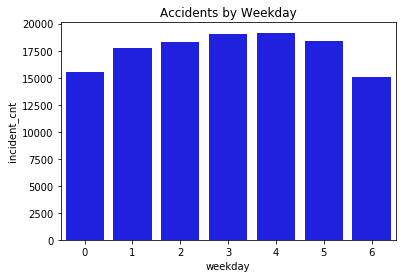

In [43]:
agg_plot_data(df4, 'weekday', 'Accidents by Weekday')

#### Show incidents by month

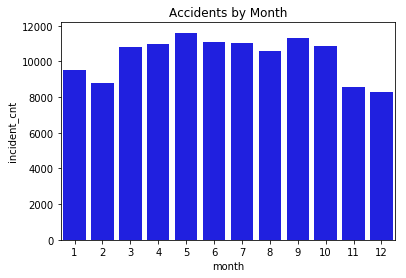

In [44]:
agg_plot_data(df4, 'month', 'Accidents by Month')

#### Accident count by time of day

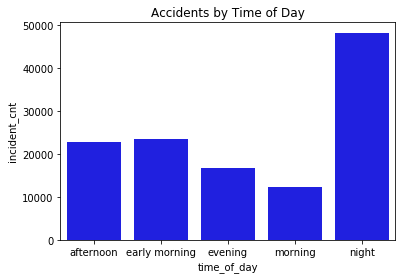

In [45]:
agg_plot_data(df4, 'time_of_day', 'Accidents by Time of Day')

#### Accident count on weekends vs. weekdays

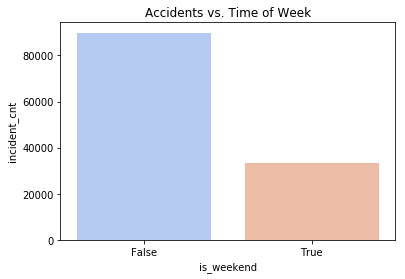

In [46]:
agg_plot_data(df4, 'is_weekend', 'Accidents vs. Time of Week', color=None, palette='coolwarm')

- An mismatch in accidents was expected due to the difference in number of week vs. weekend days

#### Determine if the difference in accident count betweek week vs. weekend is significant

In [47]:
#Define function to plot a violin plot of a given feature
def plot_hist(df, feat, feat_value, title):
    '''
    This function will generate a histogram of accident count indexed by the provided feature
    
    Inputs:
        df (dataframe): Dataframe containing the desired feature
        feat (str): Name of feature in df to filter by
        feat_value(boolean): Feature value to filter the dataframe by
        title (str): Title of chart
        
    Output: Seaborn histogram
    '''
    df_filtered = df.loc[df[feat]==feat_value]
    sns.violinplot(x='incident_cnt', data=df_filtered)
    plt.title(title)
    plt.show()

In [48]:
#Define function to test data for a normal distribution
def check_normality(df, feat, feat_value):
    '''
    This function will check the provided accident count data for normality
    
    Inputs:
        df (dataframe): Dataframe containing the desired feature
        feat (str): Name of feature in df to filter by
        feat_value(boolean): Feature value to filter the dataframe by
    
    Output (tuple): Array containing the test statistic and p-value from the normality test
    '''
    ser_filtered = df.loc[df[feat]==feat_value, 'incident_cnt']
    return scipy.stats.shapiro(ser_filtered)

In [49]:
#Define function to perform median test
def med_test(df, feat, val1=True, val2=False):
    '''
    This function will perform a Mood's median test to test if two samples 
    of accident counts come from populations with the same median
    
    Inputs:
        df (dataframe): Dataframe containing the desired feature
        feat (str): Name of feature in df to filter by
        val1 (boolean): Value of first group
        val2 (boolean): Value of second group
    
    Output: Print out of test statistic, p-value, grand median, and contingency table from median test
    '''
    ser_val1 = df.loc[df[feat]==val1, 'incident_cnt']
    ser_val2 = df.loc[df[feat]==val2, 'incident_cnt']
    test_vals = scipy.stats.median_test(ser_val1, ser_val2)
    print('Test statistic:', str(test_vals[0]) + '\n' + 
          'p-value:', str(test_vals[1]))

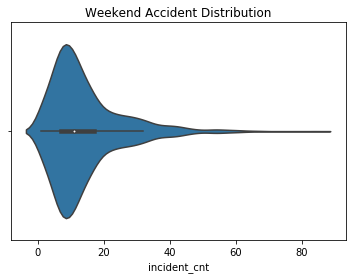

In [50]:
#Need to first check the distribution of the accident data
plot_hist(df4, 'is_weekend', True, 'Weekend Accident Distribution')

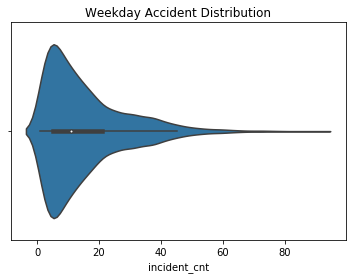

In [51]:
plot_hist(df4, 'is_weekend', False, 'Weekday Accident Distribution')

- Both distributions were right skewed and did not look normally distributed

In [52]:
#Perform Sharpiro-Wilks test for normality
week_nrm_chk = check_normality(df4, 'is_weekend', False)
weekend_nrm_chk = check_normality(df4, 'is_weekend', True)

print('Week Normality Check:', str(week_nrm_chk) + '\n' + 'Weekend Normality Check:', str(weekend_nrm_chk))

Week Normality Check: (0.8610872030258179, 0.0)
Weekend Normality Check: (0.8467729091644287, 3.699427945817517e-43)


/Users/jacoblangley/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- Since p < 0.05, the data was shown to be non-normal
- Therefore, a non-parametric comparative method was used

In [53]:
#Check for a difference in accident count on the weekdays vs. weekends
med_test(df4, 'is_weekend')

Test statistic: 2.8586270198203634
p-value: 0.09088504306198208


- Since the p-value > 0.05, we failed to reject the null hypothesis
- There was no statistically significant difference in accident count on the week vs weekend days

#### Show incident count between holiday and non-holiday days

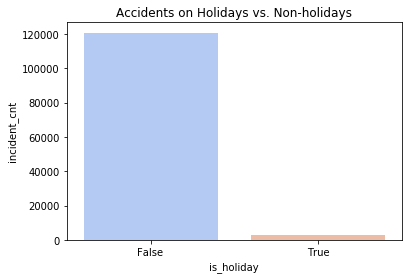

In [54]:
agg_plot_data(df4, 'is_holiday', 'Accidents on Holidays vs. Non-holidays', color=None, palette='coolwarm')

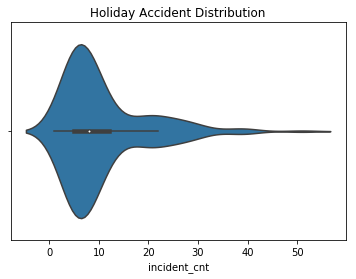

In [55]:
#Show the distribution of accident counts on holidays vs. non-holidays
plot_hist(df4, 'is_holiday', True, 'Holiday Accident Distribution')

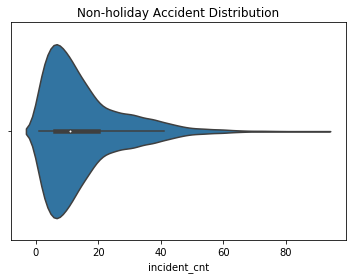

In [56]:
plot_hist(df4, 'is_holiday', False, 'Non-holiday Accident Distribution')

- Both distibutions showed a right skew and looked non-normal

In [57]:
#Test the holiday and non-holiday data for normality
non_hol_nrm_chk = check_normality(df4, 'is_holiday', False)
hol_nrm_chk = check_normality(df4, 'is_holiday', True)

print('Non-holiday Normality Check:', str(non_hol_nrm_chk) + '\n' + 'Holiday Normality Check:', str(hol_nrm_chk))

Non-holiday Normality Check: (0.8594883680343628, 0.0)
Holiday Normality Check: (0.8110682368278503, 1.5031977401055828e-16)


- Since p < 0.05, the data was shown to be non-normal
- Therefore, a non-parametric comparative method was used

In [58]:
#Check for a difference in accident count on the holidays vs. non-holidays
med_test(df4, 'is_holiday')

Test statistic: 43.8991881105507
p-value: 3.457322563948192e-11


In [59]:
#Check the median accident counts for holidays vs. non-holidays
hol_med = np.median(df4.loc[df4['is_holiday']==True, 'incident_cnt'])
non_hol_med = np.median(df4.loc[df4['is_holiday']==False, 'incident_cnt'])

print('Median holiday accidents:', str(hol_med) + '\n' + 
      'Median non-holiday accidents', str(non_hol_med))

Median holiday accidents: 8.0
Median non-holiday accidents 11.0


- Since the p-value < 0.05, we rejected the null hypothesis that the groups are statistically equivalent
- The number of accidents on non-holidays were significantly greater than on holidays

#### Show incident counts near holiday vs not

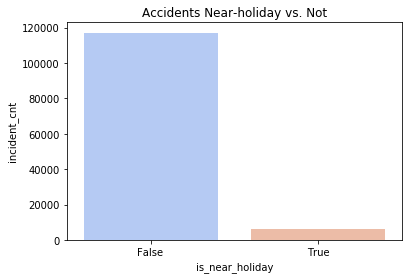

In [60]:
agg_plot_data(df4, 'is_near_holiday', 'Accidents Near-holiday vs. Not', color=None, palette='coolwarm')

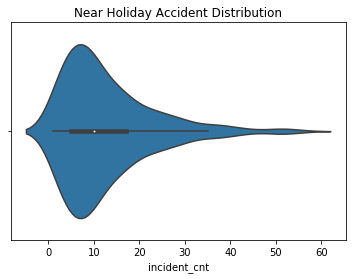

In [61]:
#Show the distribution of accident counts near vs. not near holidays
plot_hist(df4, 'is_near_holiday', True, 'Near Holiday Accident Distribution')

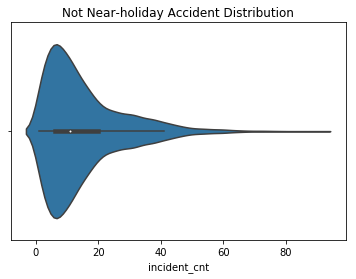

In [62]:
plot_hist(df4, 'is_near_holiday', False, 'Not Near-holiday Accident Distribution')

- Both distibutions showed a right skew and looked non-normal

In [63]:
#Test the near holiday and not near-holiday data for normality
non_near_hol_nrm_chk = check_normality(df4, 'is_near_holiday', False)
near_hol_nrm_chk = check_normality(df4, 'is_near_holiday', True)

print('Not Near-holiday Normality Check:', str(non_near_hol_nrm_chk) + '\n' + 
      'Near-holiday Normality Check:', str(near_hol_nrm_chk))

Not Near-holiday Normality Check: (0.8583954572677612, 0.0)
Near-holiday Normality Check: (0.8582137823104858, 1.52509115149863e-20)


- Since p < 0.05, the data was shown to be non-normal
- Therefore, a non-parametric comparative method was used

In [64]:
#Check for a difference in accident count on the holidays vs. non-holidays
med_test(df4, 'is_near_holiday')

Test statistic: 9.923012617987734
p-value: 0.0016322499637275178


In [65]:
#Check the median accident counts for holidays vs. non-holidays
near_hol_med = np.median(df4.loc[df4['is_near_holiday']==True, 'incident_cnt'])
not_near_hol_med = np.median(df4.loc[df4['is_near_holiday']==False, 'incident_cnt'])

print('Median not near-holiday accidents:', str(near_hol_med) + '\n' + 
      'Median near-holiday accidents', str(not_near_hol_med))

Median not near-holiday accidents: 10.0
Median near-holiday accidents 11.0


- Since the p-value < 0.05, we rejected the null hypothesis that the groups are statistically equivalent
- The number of accidents not near-holidays were significantly greater than on holidays

#### Plot time series of accidents over time

In [66]:
#Aggregate incident count by report date
df_agg_date = df4.pivot_table(values='incident_cnt', index='report_date')
df_agg_date.reset_index(inplace=True)
df_agg_date['report_date'] = pd.to_datetime(df_agg_date['report_date'])

/Users/jacoblangley/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


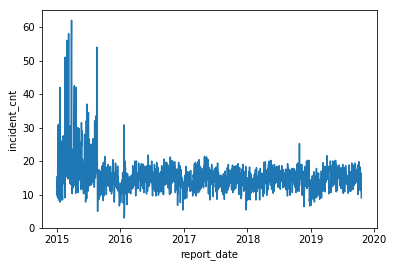

In [67]:
#Plot time series data
sns.lineplot(x='report_date', y='incident_cnt', data=df_agg_date)
plt.show()

#### Examine feature-feature relationships across the dataset

In [68]:
#Define function to generate a seaborn scatter plot
def create_scatter(df, x_feat, y_feat='incident_cnt'):
    '''This function creates a Seaborn scatter plot of the two provided features'''
    sns.scatterplot(x=x_feat, y=y_feat, data=df)
    plt.show()

In [69]:
#Create list of features to plot against incident count
scatter_feats = list(df4.columns)[2:-6]

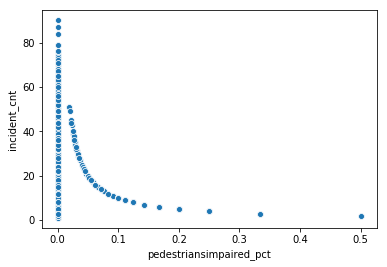

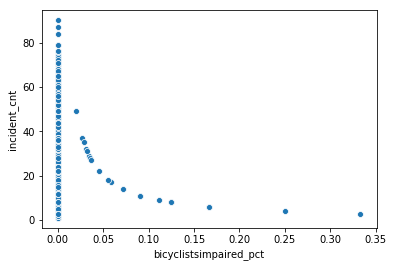

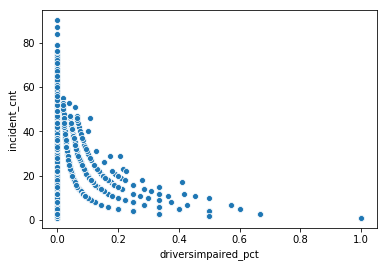

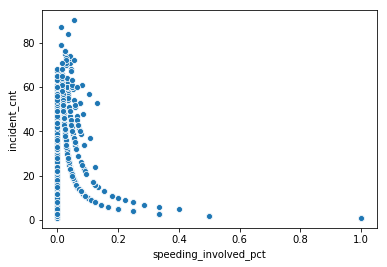

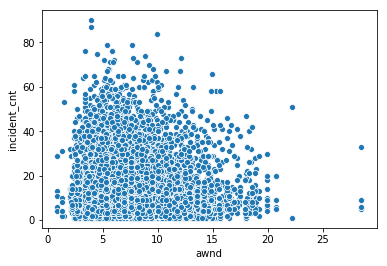

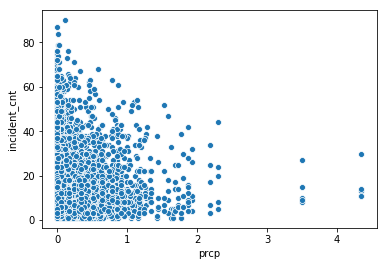

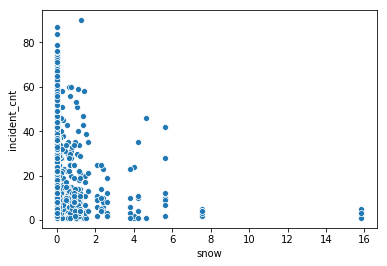

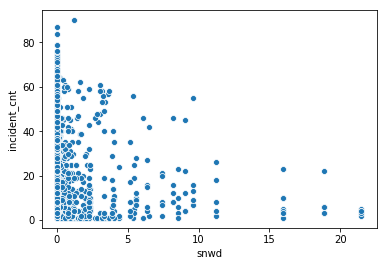

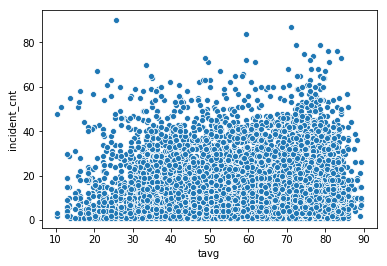

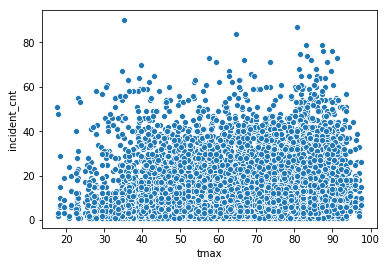

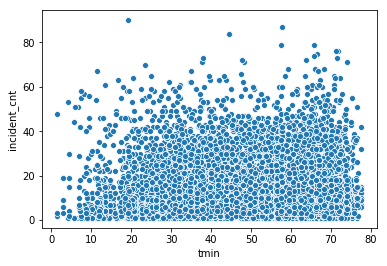

In [70]:
#Generate scatter plots for the desired features
for feat in scatter_feats:
    create_scatter(df4, feat)

#### Observations
- There were slightly more incidents on Thursdays and Fridays than other weekdays
- There seemed to be fewer accidents in the winter months compared to the other three seasons
- There were significantly more accidents at night than any other time of day
- No meaningful observations could be made on the weekend, holiday, or near holiday incident counts without a normalization
- There were significantly more accidents in the first half of 2015 than in the time that followed

### Section V: Feature selection
- Check for correlations between features and target to determine the most important features

#### Use Pearson's Correlation to identify the most important features

In [71]:
#Define func to generate heatmap of Pearson's Correlation coefficients
def pearsons_corr(df, fig_size):
    '''
    This function generates a heatmap of Pearson's Correlation Coefficients 
    for all features in a dataset
    
    Inputs:
        df (dataframe): Dataset to use for calculations
        figsize(tuple): Tuple of figsize
    Output: None
    '''
    plt.figure(figsize=fig_size)
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

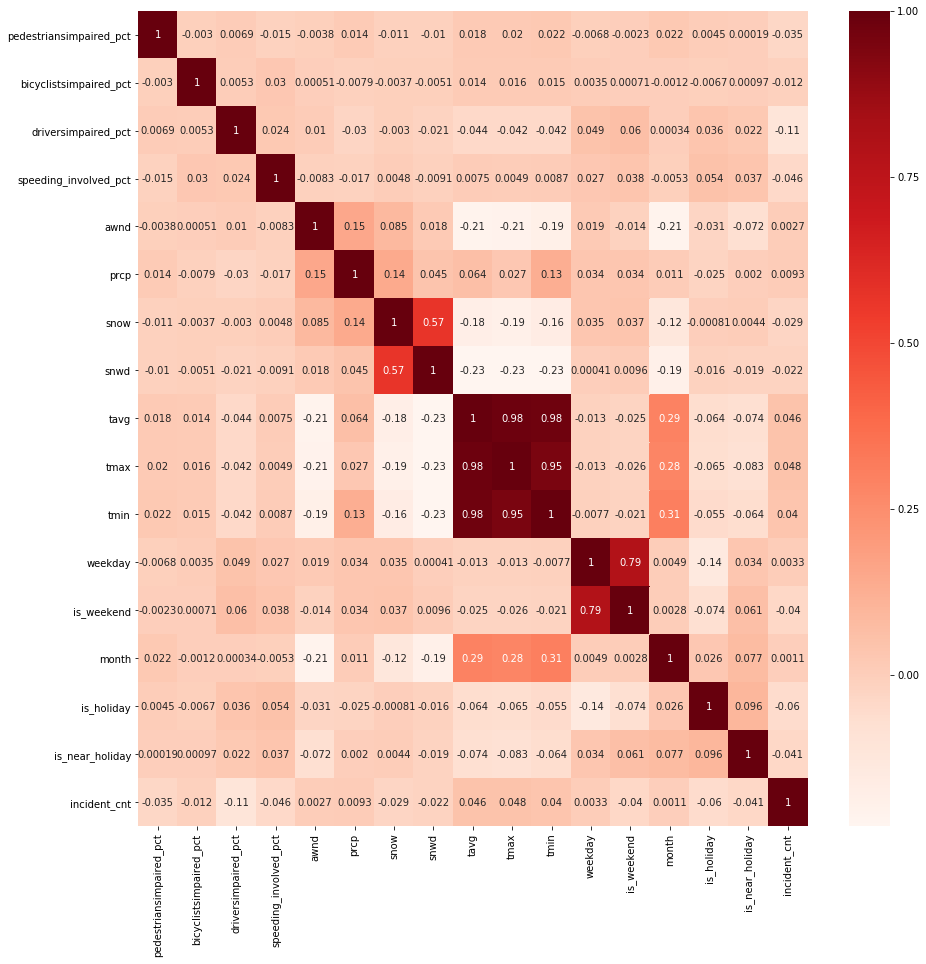

In [72]:
#Plot heatmap
pearsons_corr(df4, (15, 15))

- None of the features showed a strong correlation to the number of accidents
- Continued analysis with all features

### Section V: Model evaluation
- Evaluate several models to select the one with the highest performance

In [73]:
#Drop the report date feature prior to evaluating models
df5 = df4.drop('report_date', axis=1)

#### Model eval prep

In [74]:
#Separate features and target variable
X = df5.drop('incident_cnt', axis=1)
y = df5['incident_cnt'].copy()

In [75]:
#Create test/training split
##Data stratified to prevent bias against features with imbalanced values
from sklearn.model_selection import train_test_split

strat_feats = ['is_weekend', 'is_holiday', 'is_near_holiday']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X[strat_feats])

In [76]:
#Define func to calculate and print Coefficient of Determination (R^2) and RMSE of a regression model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def regression_metrics(y_true, y_pred):
    '''This function will calculate the coefficient of determination 
    and RMSE of a given regression model'''
    r2 = r2_score(y_true, y_pred)
    r2_ = round(r2, 2)
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = round(np.sqrt(mse), 1)
    
    return [r2, rmse, str('R^2: ' + str(r2_) + ', ' + 'RMSE: ' + str(rmse))]

#### Data processing

In [77]:
#Define func to separate df features into numerical and categorical lists
def separate_feats(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    num_feats = [i for i in df.columns if df[i].dtype in numerics]
    cat_feats = [i for i in df.columns if i not in num_feats]
    
    return num_feats, cat_feats

In [78]:
#Create lists of numical and categorical features
num_feats, cat_feats = separate_feats(X_test)

In [79]:
#Define pipeline to transform numerical features
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), \
                         ('std_scaler', StandardScaler())])

In [80]:
#Define pipeline to transform categorical features
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), \
                        ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [81]:
#Create ColumnTransformer object to operate on the numeric and categorical columns separately
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([('num', num_pipeline, num_feats), \
                                   ('cat', cat_pipeline, cat_feats)])

In [82]:
#Transform the feature set to normalize and encode numerical and categorical features respectively
X_train_prep = full_pipeline.fit_transform(X_train)
X_test_prep = full_pipeline.fit_transform(X_test)

#### Multiple linear regression

In [83]:
#Train multiple linear regression and make predictions on test set
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prep, y_train)
lin_pred = lin_reg.predict(X_test_prep)

In [84]:
#Determine model performance
regression_metrics(y_test, lin_pred)[2:]

['R^2: 0.4, RMSE: 9.4']

#### Ridge Regression Linear Model

In [85]:
#Train the model, make predictions
from sklearn.linear_model import Ridge

rdg_reg = Ridge(alpha=100)
rdg_reg.fit(X_train_prep, y_train)
rdg_pred = rdg_reg.predict(X_test_prep)

In [86]:
#Determine Ridge regression model performance
regression_metrics(y_test, rdg_pred)[2:]

['R^2: 0.4, RMSE: 9.4']

#### Lasso Regression Linear Model

In [87]:
#Train the lasso regression model, make prediction
from sklearn.linear_model import Lasso

las_reg = Lasso(alpha=0.0001)
las_reg.fit(X_train_prep, y_train)
las_pred = las_reg.predict(X_test_prep)

In [88]:
#Determine model performance
regression_metrics(y_test, las_pred)[2:]

['R^2: 0.4, RMSE: 9.4']

- Linear regression models did not appear to be sufficiently modelling the data
- Other models were evaluated

#### Random Forest Regression

In [89]:
#Train the random forest regressor model
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor()
rnd_reg.fit(X_train_prep, y_train)
rnd_pred = rnd_reg.predict(X_test_prep)

In [90]:
#Determine model performance
regression_metrics(y_test, rnd_pred)[2:]

['R^2: 0.62, RMSE: 7.4']

#### SVM

In [91]:
#Instantiate and train the SVM regression model
##Larger gamma & C parameter values seem to reduce error
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear', gamma=1, C=10)    #9.663
svm_reg.fit(X_train_prep, y_train)
svm_pred = svm_reg.predict(X_test_prep)

In [92]:
regression_metrics(y_test, svm_pred)[2:]

['R^2: 0.36, RMSE: 9.7']

- The Random Forest Regression model performed the best with minimal tuning
- This model was chosen as the primary model to optimize

### Section VI: Model optimization
- Optimize the selected model to increase performance and reduce error

#### Optimize random forest paramters with RandomizedSearchCV

In [93]:
#Start parameter refining with RandomizedSearchCV. Start by defining parm ranges to iterate through.

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Method of selecting samples for training each tree
bootstrap = [True, False]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [94]:
#Perform RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# rnd_reg_rand = RandomizedSearchCV(estimator=rnd_reg, param_distributions=random_grid, n_iter=50, cv=3, \
#                                verbose=1, random_state=42, n_jobs=-1)

#Fit the random search model
# rnd_reg_rand.fit(X_train_prep, y_train)

In [95]:
#View the best parms determined by RandomizedSearchCV
# rnd_reg_rand.best_params_

#Define the best parameters in a dict to avoid running optimization in the future
rnd_reg_rand_best_params_ = {'n_estimators': 200,
                             'min_samples_split': 5,
                             'min_samples_leaf': 4,
                             'max_features': 'auto',
                             'max_depth': 10,
                             'bootstrap': True}

In [96]:
#Re-instantiate/fit the Random Forest Regressor model with the new parms
rnd_reg2 = RandomForestRegressor(**rnd_reg_rand_best_params_)
rnd_reg2.fit(X_train_prep, y_train)
rnd_pred2 = rnd_reg2.predict(X_test_prep)

In [97]:
#Check the error of the optimized model
regression_metrics(y_test, rnd_pred2)[2:]

['R^2: 0.65, RMSE: 7.2']

- There was a slight decrease in RMSE after paramter optimization
- The Random Forest Regression model was completed and ready to make future predictions